# Projeto 1

## Dataset

Vamos trabalhar com o dataset Diamonds, que pode ser encontrado em https://www.kaggle.com/datasets/shivam2503/diamonds.

## Objetivo

Nosso objetivo é fazer uma máquina preditiva que calcule o preço de um diamante a partir das variáveis que estão no dataset.

## Parâmetros

* Preço: essa é nossa variável target do problema. A moeda utilizada é o dola(US$);
* Quilate: é o peso do diamante;
* Corte: há alguns tipos de corte para diamantes. Existe um rank para esses cortes;
* Cor: é a cor do diamante;
* x: é o comprimento do diamante em milímetros;
* y: é a largura do diamante em milímetros 
* z: é a altura do diamante em milímetros;
* depth: é a profundidade do diamante;
* table: é a largura do topo do diamante em relação ao ponto mais largo.

## Observações

Para um primeiro trabalho, vamos utilizar somente essas variáveis e no futuro estudaremos melhor esse ponto para deixar o modelo o mais eficiente possível.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

### Vizualização dos Dados 

In [2]:
df = pd.read_csv('Diamonds Prices2022.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe().round(2)

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.00,53943.00,53943.00,53943.00,53943.00,53943.00,53943.00,53943.00
mean,26972.00,0.80,61.75,57.46,3932.73,5.73,5.73,3.54
std,15572.15,0.47,1.43,2.23,3989.34,1.12,1.14,0.71
min,1.00,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,13486.50,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,26972.00,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,40457.50,1.04,62.50,59.00,5324.00,6.54,6.54,4.04
max,53943.00,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [6]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Para o nosso modelo, a variável Unnamed: 0 não é útil, pois ela só informa o númerop de registro na tabela, logo, vamos retirala.

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


# Análise dos Dados

Primeiro, vamos mostrar um gráfico que mostra as relações entre as variáveis.

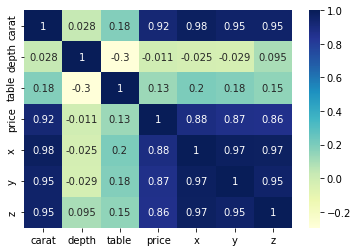

In [10]:
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

Agora, vamos criar um report que mostra uma análise gráfica do nosso dataset. Obs: O report fica muito pesado para aparecer no git hub mas o comando para esse report é:  

- from dataprep.eda import create_report
- create_report(df)

Com esse report, podemos verificar que existem valores faltantes nas colunas de dimensões(x, y e z), vsamos retiralos mais tarde.

Também podemos indentificar uma alta correlação entre o preço e as variáveis caret(quilate) e dimensões.

# Pré-Processamento dos Dados

A primeira coisa que notamos são os tipos de cada variável. Temos $3$ variáveis que não são numéricas, logo, devemos transformalas em numéricas para que nosso modelo consiga interpretar essas variáveis. Para resolver este problema, vamos utilizar o OneHotEncoder do pacote Scikit Learn.

In [12]:
ohe = OneHotEncoder()

In [13]:
color = ohe.fit_transform(df.color.values.reshape(-1,1)).toarray()
cut = ohe.fit_transform(df.cut.values.reshape(-1,1)).toarray()
clarity = ohe.fit_transform(df.clarity.values.reshape(-1,1)).toarray()

Ao usar o OneHotEncoder podemos ter o problema de muilticolinearidade entre as variáveis dummy. 

In [14]:
df_color = pd.DataFrame(color, columns=['E', 'I', 'J', 'H', 'F', 'G', 'D']) 
df_color

,E,I,J,H,F,G,D
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
53938,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53939,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53940,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
df_cut = pd.DataFrame(cut, columns=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
df_cut

,Ideal,Premium,Good,Very Good,Fair
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53938,0.0,0.0,0.0,1.0,0.0
53939,0.0,0.0,1.0,0.0,0.0
53940,0.0,0.0,0.0,1.0,0.0
53941,0.0,0.0,0.0,1.0,0.0


In [16]:
df_clarity = pd.DataFrame(clarity, columns=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
df_clarity

,SI2,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df = df.drop(['cut', 'clarity', 'color'], axis=1)
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43


In [18]:
df = pd.concat([df, df_color, df_cut, df_clarity], axis=1)
df

,carat,depth,table,price,x,y,z,E,I,J,...,Very Good,Fair,SI2,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Valores Nulos

podemos observar que existem alguns valores nulos nas colunas x, y e z, isso deve ocorrer por causa da unidade que estes parâmetros estão. Vamos tirar as linhas que tem esses valores nulos.

In [19]:
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)
df

,carat,depth,table,price,x,y,z,E,I,J,...,Very Good,Fair,SI2,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X = df.drop(columns = ['price'])

In [21]:
y = np.log(df['price'])

In [22]:
X

,carat,depth,table,x,y,z,E,I,J,H,...,Very Good,Fair,SI2,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53939,0.75,62.2,55.0,5.83,5.87,3.64,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.71,60.5,55.0,5.79,5.74,3.49,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53941,0.71,59.8,62.0,5.74,5.73,3.43,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53938    7.921898
53939    7.921898
53940    7.921536
53941    7.921536
53942    7.921898
Name: price, Length: 53923, dtype: float64

In [24]:
X.shape

(53923, 26)

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25, random_state = 3)

In [26]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((40442, 26), (40442,), (13481, 26), (13481,))

Agora que já dividimos o nosso dataset em treino e teste, começaremos a treinar modelos e avaliá-los. 

## Regressão Linear

In [27]:
linreg = LinearRegression()

In [28]:
linreg.fit(Xtrain, ytrain)

LinearRegression()

In [29]:
y_pred = linreg.predict(Xtest)

In [30]:
r2_score(ytest,  y_pred)

0.9571720552272472

In [31]:
mean_absolute_error(ytest, y_pred)

0.10610119379831931

Podemos notar que a regressão linear conseguiu um r2 score de 95% que é excelente!

## KNN

In [32]:
vizinhos = [1,3,5,10]

for i in vizinhos:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    y_pred = knn.predict(Xtest)
    
    print("Número de vizinho é ", i, "e o R2 Score vale: ", r2_score(ytest, y_pred))

Número de vizinho é  1 e o R2 Score vale:  0.9517436028847021
Número de vizinho é  3 e o R2 Score vale:  0.9649829072293732
Número de vizinho é  5 e o R2 Score vale:  0.9666694671735917
Número de vizinho é  10 e o R2 Score vale:  0.9668135399529049


Podemos observar que o modelo KNN teve uma r2 score de 96% igual com 3 vizinhos.

## RandomForestRegressor

In [33]:
rfr = RandomForestRegressor(n_estimators=300, random_state=7, max_depth=25)

In [34]:
rfr.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=25, n_estimators=300, random_state=7)

In [35]:
y_pred = rfr.predict(Xtest)

In [36]:
r2_score(ytest, y_pred)

0.9915377594385872

In [37]:
estimadores = [50, 100, 150, 200]

for i in estimadores:
    rfr = RandomForestRegressor(n_estimators=i, random_state=7, max_depth=20)
    rfr.fit(Xtrain, ytrain)
    y_pred = rfr.predict(Xtest)
    
    print("Número de estimadores é ", i, "e o R2 Score vale: ", r2_score(ytest, y_pred))

Número de estimadores é  50 e o R2 Score vale:  0.9913653098255871
Número de estimadores é  100 e o R2 Score vale:  0.9914279932246087
Número de estimadores é  150 e o R2 Score vale:  0.9914672521094754
Número de estimadores é  200 e o R2 Score vale:  0.9914852420919572


Podemos ver que o RandomForestRegressor com 100 estimadores teve uma performace de 99,14%, praticamente perfeito. Escolhemos esse estimador, pois requer menos processo no computador, ou seja, é mais rápido e não perde tanto a eficiência.

# Conclusão 

Vimos que o modelo que teve a melhor performace foi o Random Florest, com um R2 score de 99,926%. Talvez ainda de para fazer uma limpeza melhor nos dados e conseguir uma performace ligeiramente melhor, mas não sei se valeria a pena.